# **Step 1: Dataset for this task**

Guidelines: Download the dataset from the link provided and import it into your notebook

Link: https://drive.google.com/file/d/1F65Br7-pkcTZ05d9JG_-qdsKCd_WOyKo/view

# **Step 2: Import necessary libraries**

Guidelines: Import all required libraries here

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import iqr,scoreatpercentile
import seaborn as sns
from scipy.optimize import curve_fit

# **Step 3: Import Dataset**

Guidelines: Import the csv dataset into a dataframe

In [ ]:
d1=pd.read_csv("https://drive.google.com/uc?id=1F65Br7-pkcTZ05d9JG_-qdsKCd_WOyKo")

# Step 4: Data Cleaning

Guidelines: Prepare the data for analysis

In [ ]:
d1.info()
#Inferences:
#as we can see in info,There is no NULL value (or NaN) in the data entries.
#All the columns are of the appropriate data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [ ]:
"""
First deleting irrelevant columns of the dataset: "id" is an irrelevant column for our data analysis and model training as it does not
provide us with any insight into the data.
"""
d1.drop("id", axis=1, inplace=True)

In [ ]:
#categorically dividing the columns based on data type:
Obj_type = [i for i in d1.columns if d1[i].dtype == 'object']
Num_col = [i for i in d1.columns if d1[i].dtype == 'int64']

In [ ]:
#Converting all the object/strings to upper case so the duplicates/differences do not occur due to differing case:

d1.columns = d1.columns.str.strip().str.lower()
for i in Obj_type:
  d1[i] = d1[i].astype(str).str.lower()


Obj_type = [i for i in d1.columns if d1[i].dtype == 'object']
Num_col = [i for i in d1.columns if d1[i].dtype == 'int64']
print(Obj_type, Num_col)

['gender', 'education', 'region', 'loyalty_status', 'purchase_frequency', 'product_category'] ['age', 'income', 'purchase_amount', 'promotion_usage', 'satisfaction_score']


In [ ]:
#counting number of duplicates:
d1.duplicated().sum()

#deleting duplicates:
d1.drop_duplicates(inplace=True)

#removing data entries with missing values
d1.dropna(inplace=True)

In [ ]:
d1.info()
#Verifying our deletions and noting that the entries are unique
#Also Note the reduction in memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 100000 non-null  int64 
 1   gender              100000 non-null  object
 2   income              100000 non-null  int64 
 3   education           100000 non-null  object
 4   region              100000 non-null  object
 5   loyalty_status      100000 non-null  object
 6   purchase_frequency  100000 non-null  object
 7   purchase_amount     100000 non-null  int64 
 8   product_category    100000 non-null  object
 9   promotion_usage     100000 non-null  int64 
 10  satisfaction_score  100000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 8.4+ MB


In [ ]:
d1[d1.columns].nunique()
#checking for the unique values in every column.

,0
age,38
gender,2
income,40003
education,4
region,4
loyalty_status,3
purchase_frequency,3
purchase_amount,18902
product_category,7
promotion_usage,2


In [ ]:
d1.isnull().sum()
#Filling NULL values is not required as there are no NULL values

,0
age,0
gender,0
income,0
education,0
region,0
loyalty_status,0
purchase_frequency,0
purchase_amount,0
product_category,0
promotion_usage,0


In [ ]:
"""Handling the outliers:
Appropriate parameters for outliers are:
-Age outliers
-Income outlier
-Satisfaction_score Outlier
-Promotion_usage Outlier
-Purchase amount Outlier
"""
#I have increased the whiskers to 2x of the IQR, as comapred to 1.5x for age

'Handling the outliers:\nAppropriate parameters for outliers are:\n-Age outliers\n-Income outlier\n-Satisfaction_score Outlier\n-Promotion_usage Outlier\n-Purchase amount Outlier\n'

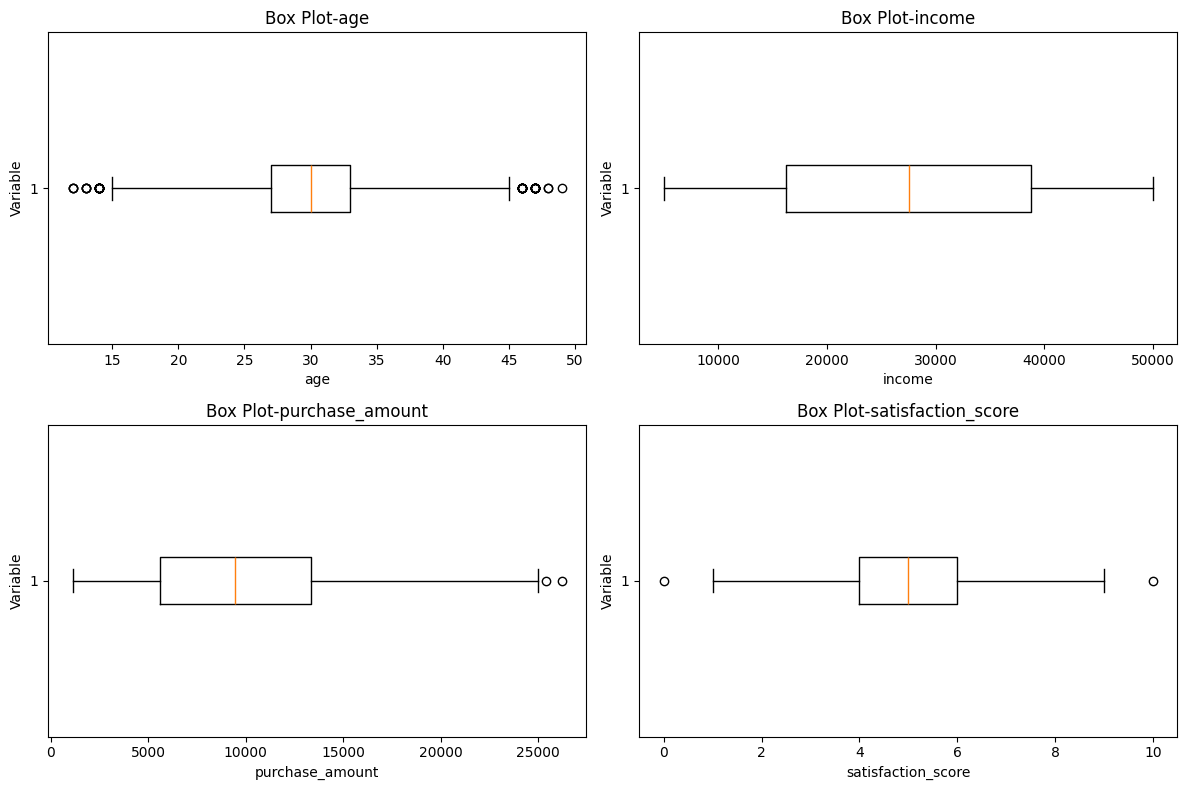

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
plot_idx = 0
for i in Num_col:
    if i == "promotion_usage": continue
    if i == "age":
        axes[plot_idx].boxplot(d1[i], vert=False, whis=2)
    else:
        axes[plot_idx].boxplot(d1[i], vert=False)
    axes[plot_idx].set_ylabel('Variable')
    axes[plot_idx].set_xlabel(i)
    axes[plot_idx].set_title('Box Plot-' + i)
    plot_idx += 1
    if plot_idx == 4: break
plt.tight_layout()
plt.show()

In [ ]:
#Number of outliers per category
outliers = {}
for i in Num_col:
    Q1 = d1[i].quantile(0.25)
    Q3 = d1[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[i] = ((d1[i] < lower_bound) | (d1[i] > upper_bound)).sum()
print(pd.DataFrame(outliers.items(),columns=["Num_col","Count of outliers"]))

              Num_col  Count of outliers
0                 age                513
1              income                  0
2     purchase_amount                  2
3     promotion_usage                  0
4  satisfaction_score                  2


In [ ]:
#replacing the outlier values with nearest Non-outlier/IQR dispersion value: I have used Winsorization method
for col in Num_col:
    if col == "promotion_usage":
      continue
    Q1 = d1[col].quantile(0.25)
    Q3 = d1[col].quantile(0.75)
    IQR = Q3 - Q1
    if col=="age":
      lower_bound = Q1 - 2 * IQR
      upper_bound = Q3 + 2 * IQR
    else:
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
    d1[col] = np.where(d1[col] < lower_bound, lower_bound, d1[col])
    d1[col] = np.where(d1[col] > upper_bound, upper_bound, d1[col])

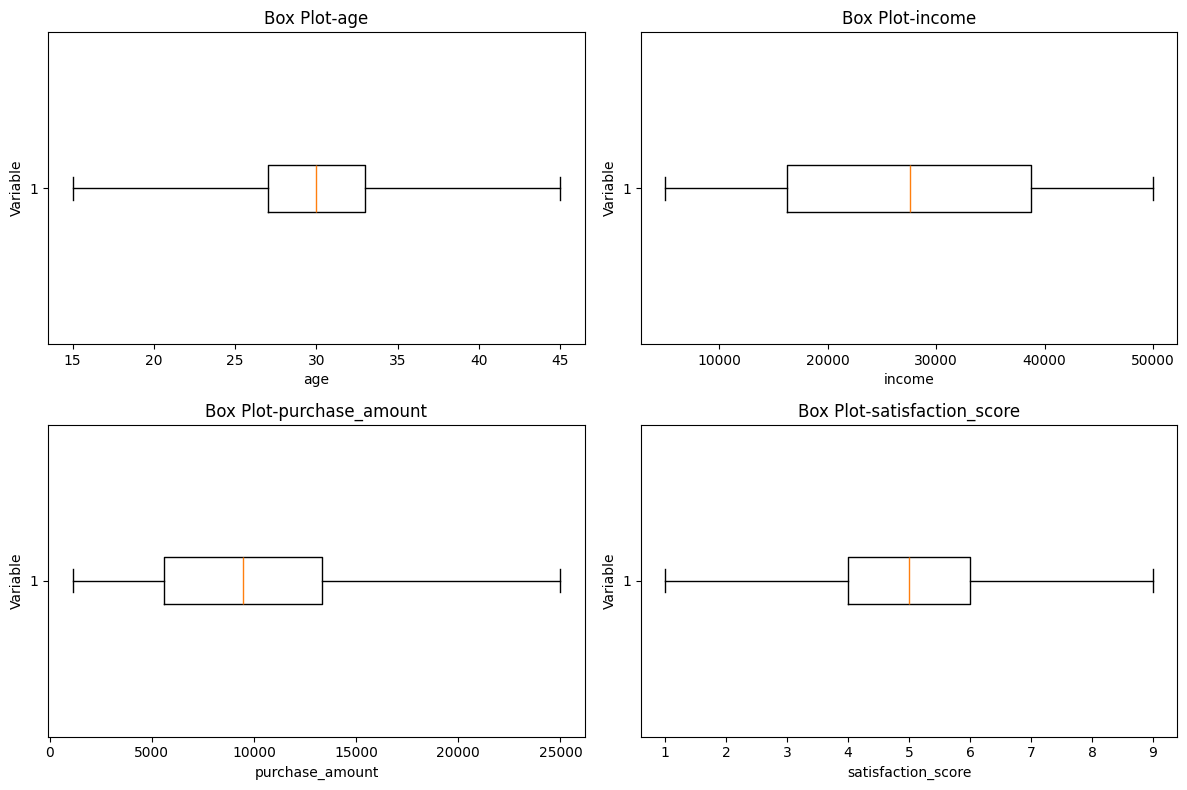

In [ ]:
#Verification of the Outlier handling, expected result: minimization of whiskers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
plot_idx = 0
for i in Num_col:
    if i == "promotion_usage": continue
    if i == "age":
        axes[plot_idx].boxplot(d1[i], vert=False, whis=2)
    else:
        axes[plot_idx].boxplot(d1[i], vert=False)
    axes[plot_idx].set_ylabel('Variable')
    axes[plot_idx].set_xlabel(i)
    axes[plot_idx].set_title('Box Plot-' + i)
    plot_idx += 1
    if plot_idx == 4: break
plt.tight_layout()
plt.show()


In [ ]:
#Adding more parameters to the graph of great relevance
d1['spending_ratio'] = d1['purchase_amount'] / d1['income']
d1['spending_ratio'].fillna(0, inplace=True)

<ipython-input-16-5f861a35ae38>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d1['spending_ratio'].fillna(0, inplace=True)


# Step 5: Analysis

Guidelines: Perform your analysis here

**1 - Univariate statistical Analysis: For the int-type columns**

In [ ]:
#Summary statistics:
d2 = d1[[i for i in Num_col if i != "promotion_usage"]]
d2t = d2.describe()

for i in Num_col:
    if i == "promotion_usage":
        continue
    Q1 = d2t.loc['25%', i]
    Q3 = d2t.loc['75%', i]
    IQR = Q3 - Q1
    PQD = ((Q3 - Q1) / (Q3 + Q1)) * 100
    d2t.loc['IQR', i] = IQR
    d2t.loc['PQD', i] = PQD

d2t

,age,income,purchase_amount,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,30.003090,27516.269880,9634.774750,5.009650
std,4.477785,12996.782587,4799.286254,1.038628
min,15.000000,5000.000000,1118.000000,1.000000
25%,27.000000,16271.750000,5583.000000,4.000000
50%,30.000000,27584.500000,9452.000000,5.000000
75%,33.000000,38747.250000,13350.000000,6.000000
max,45.000000,50000.000000,25000.500000,9.000000
IQR,6.000000,22475.500000,7767.000000,2.000000
PQD,10.000000,40.850433,41.023610,20.000000


<ipython-input-18-90f189297268>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend=d1.groupby('age_group')['purchase_amount'].mean().sort_index()
<ipython-input-18-90f189297268>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_spend=d1.groupby('age_group')['purchase_amount'].median().sort_index()


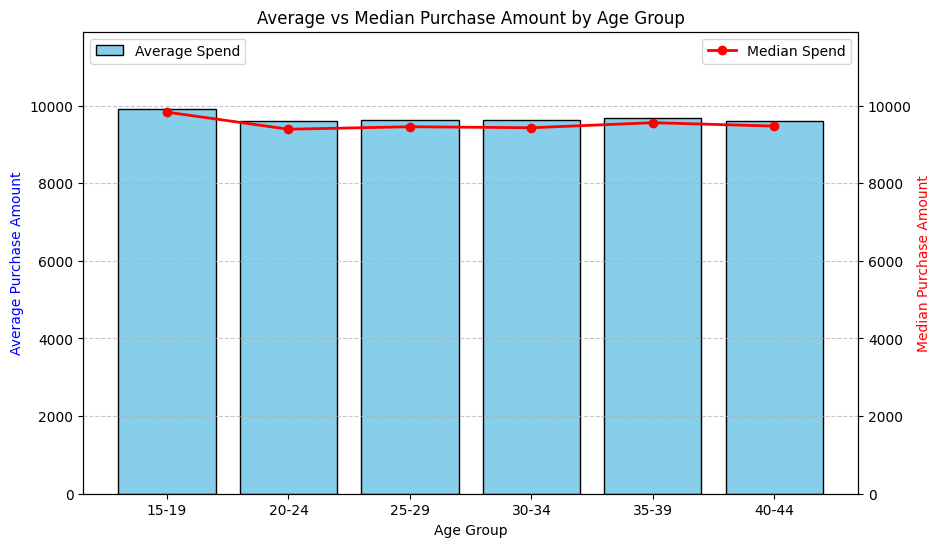

In [ ]:
#Age vs (Average)Spending graph:
bins=[15,20,25,30,35,40,45,50]
labels=["15-19","20-24","25-29","30-34","35-39","40-44","45-50"]
d1['age_group']=pd.cut(d1['age'],bins=bins,labels=labels,include_lowest=True)

avg_spend=d1.groupby('age_group')['purchase_amount'].mean().sort_index()
median_spend=d1.groupby('age_group')['purchase_amount'].median().sort_index()

fig,ax1=plt.subplots(figsize=(10,6))
ax1.bar(avg_spend.index,avg_spend.values,color='skyblue',edgecolor='black',label="Average Spend")

ax2=ax1.twinx()
ax2.plot(median_spend.index,median_spend.values,color='red',marker='o',linestyle='-',linewidth=2,label="Median Spend")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Average Purchase Amount",color="blue")
ax2.set_ylabel("Median Purchase Amount",color="red")
ax1.set_ylim(0,max(avg_spend.max(),median_spend.max())*1.2)
ax2.set_ylim(0,max(avg_spend.max(),median_spend.max())*1.2)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
ax1.grid(axis='y',linestyle='--',alpha=0.7)
plt.title("Average vs Median Purchase Amount by Age Group")
plt.show()

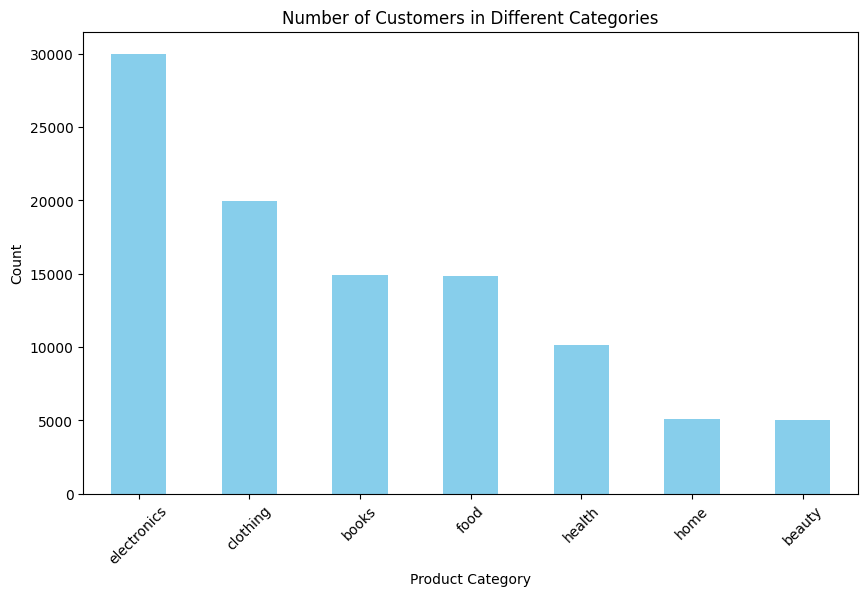

In [ ]:
#Number of Customers of different product category:
customer_category_count = d1['product_category'].value_counts()
plt.figure(figsize=(10, 6))
customer_category_count.plot(kind='bar', color='skyblue')
plt.title("Number of Customers in Different Categories")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

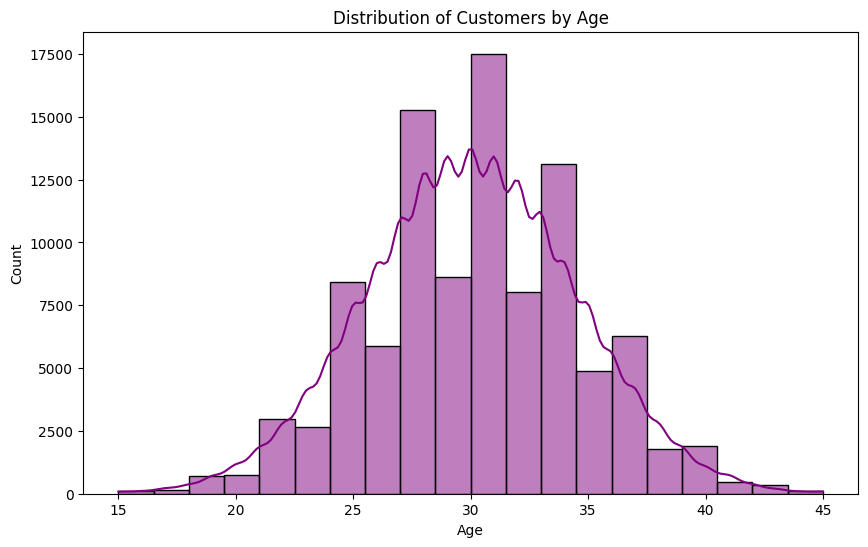

In [ ]:
#Distribution of age of the customers:
plt.figure(figsize=(10, 6))
sns.histplot(d1['age'], bins=20, kde=True, color='purple')
plt.title("Distribution of Customers by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<ipython-input-21-9f717ccdac33>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_spend = d1.groupby('income_group')['purchase_amount'].median()


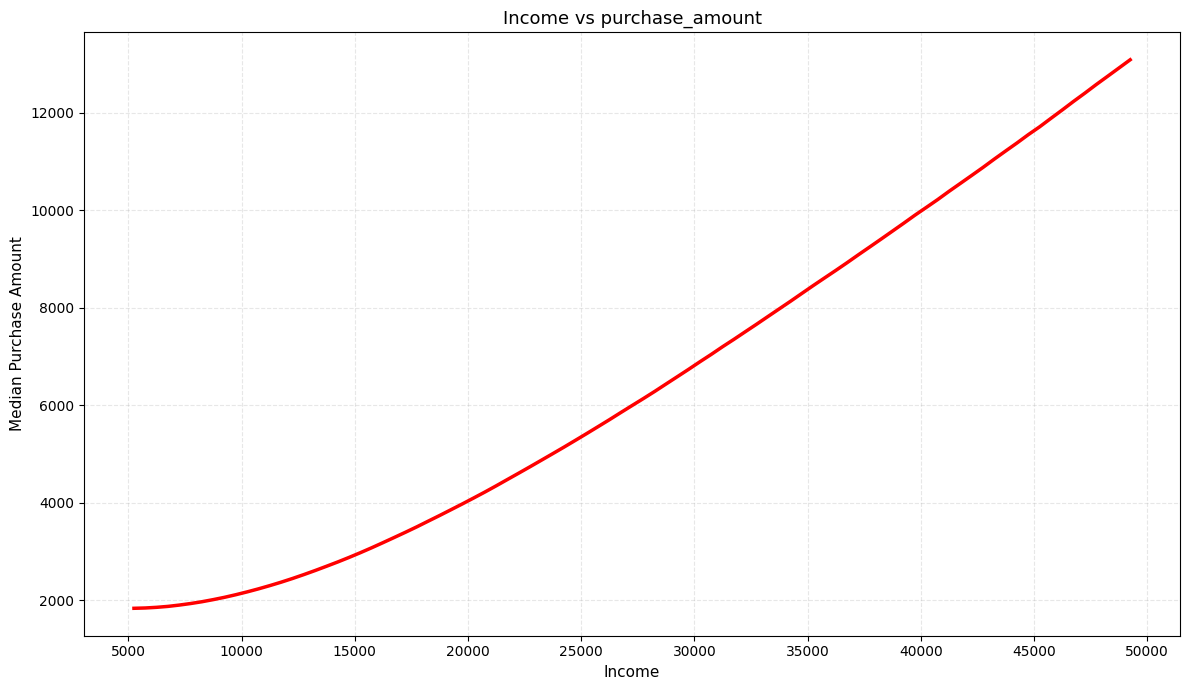

In [ ]:
#Income vs median purchase_amount- line plot
d1['income_group'] = pd.cut(d1['income'], bins=range(5000, 50000, 500))
median_spend = d1.groupby('income_group')['purchase_amount'].median()
income_midpoints = [interval.mid for interval in median_spend.index]
smoothed_spending = median_spend.ewm(span=50, adjust=False).mean()
plt.figure(figsize=(12,7)); plt.plot(income_midpoints, smoothed_spending.values, color='red', linewidth=2.5)
plt.xlabel("Income", fontsize=11); plt.ylabel("Median Purchase Amount", fontsize=11)
plt.title("Income vs purchase_amount", fontsize=13)
plt.grid(axis='both', linestyle='--', alpha=0.3)
plt.xticks(range(5000, 55000, 5000), fontsize=10, rotation=0); plt.yticks(fontsize=10)
plt.tight_layout(); plt.show()

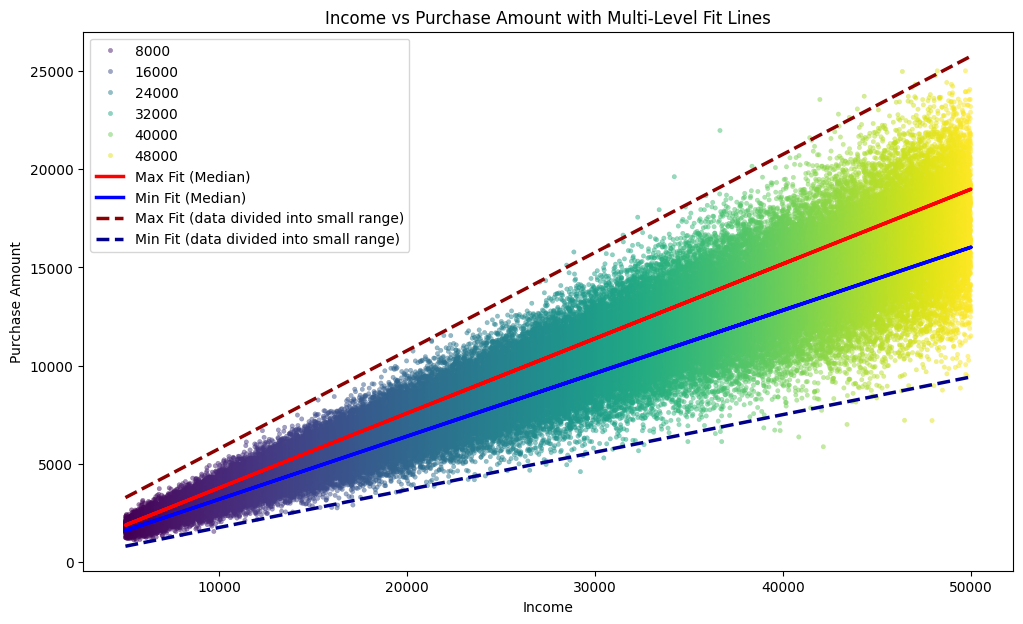

In [ ]:
#Cluster graph analyising the max and min spend patterns:
def linear_fit(x, a, b): return a * x + b

income_values = d1['income'].values
max_values = d1.groupby('income')['purchase_amount'].max()
min_values = d1.groupby('income')['purchase_amount'].min()

popt_max, _ = curve_fit(linear_fit, max_values.index, max_values.values)
popt_min, _ = curve_fit(linear_fit, min_values.index, min_values.values)

range_size = 1000
d1['income_range'] = (d1['income'] // range_size) * range_size
max_values_range = d1.groupby('income_range')['purchase_amount'].max()
min_values_range = d1.groupby('income_range')['purchase_amount'].min()
income_range_values = max_values_range.index

popt_max_range, _ = curve_fit(linear_fit, income_range_values, max_values_range)
popt_min_range, _ = curve_fit(linear_fit, income_range_values, min_values_range)

plt.figure(figsize=(12,7))
sns.scatterplot(data=d1, x='income', y='purchase_amount', hue='income', palette='viridis', alpha=0.5, edgecolor=None, s=10)
plt.plot(income_values, linear_fit(income_values, *popt_max), color='red', linewidth=2.5, label='Max Fit (Median)')
plt.plot(income_values, linear_fit(income_values, *popt_min), color='blue', linewidth=2.5, label='Min Fit (Median)')
plt.plot(income_range_values, linear_fit(income_range_values, *popt_max_range), color='darkred', linewidth=2.5, linestyle='dashed', label='Max Fit (data divided into small range)')
plt.plot(income_range_values, linear_fit(income_range_values, *popt_min_range), color='darkblue', linewidth=2.5, linestyle='dashed', label='Min Fit (data divided into small range)')
plt.xlabel("Income")
plt.ylabel("Purchase Amount")
plt.title("Income vs Purchase Amount with Multi-Level Fit Lines")
plt.legend()
plt.show()

<ipython-input-23-a81fde722ff9>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_income = d1.groupby('income_group')['income'].median()
<ipython-input-23-a81fde722ff9>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_spend = d1.groupby('income_group')['purchase_amount'].median()


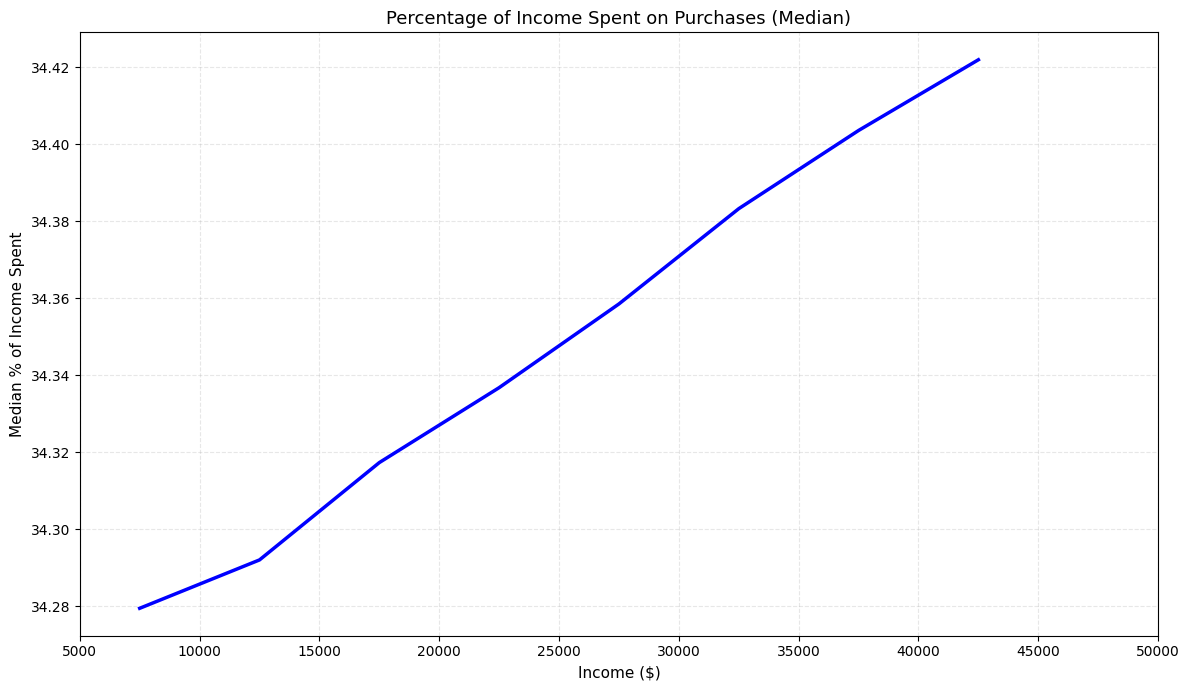

In [ ]:
# %age of income being spent on the purchases (median): plot
d1['income_group'] = pd.cut(d1['income'], bins=range(5000, 50000, 5000))
median_income = d1.groupby('income_group')['income'].median()
median_spend = d1.groupby('income_group')['purchase_amount'].median()

spend_ratio = (median_spend / median_income) * 100
income_midpoints = [interval.mid for interval in spend_ratio.index]
smoothed_ratio = spend_ratio.ewm(span=50, adjust=False).mean()

plt.figure(figsize=(12,7));
plt.plot(income_midpoints, smoothed_ratio.values, color='blue', linewidth=2.5)
plt.xlabel("Income ($)", fontsize=11); plt.ylabel("Median % of Income Spent", fontsize=11)
plt.title("Percentage of Income Spent on Purchases (Median)", fontsize=13)
plt.grid(axis='both', linestyle='--', alpha=0.3)
plt.xticks(range(5000, 55000, 5000), fontsize=10, rotation=0); plt.yticks(fontsize=10)
plt.tight_layout(); plt.show()

In [ ]:
#Gender based behavioural patterns

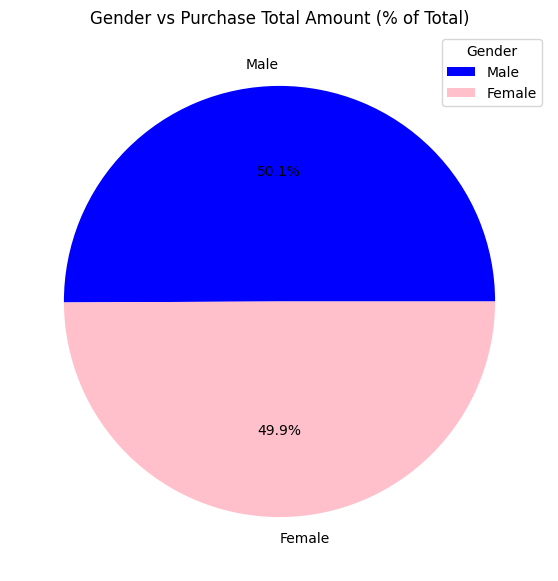

In [ ]:
#Split of Gender contribution:
gender_purchase_totals = d1.groupby('gender')['purchase_amount'].sum()
plt.figure(figsize=(7, 7))
colors = ['blue', 'pink']
labels = ['Male', 'Female']
plt.pie(gender_purchase_totals, labels=labels, autopct='%1.1f%%', colors=colors)
plt.legend(labels=labels, loc='upper right', title="Gender")
plt.title("Gender vs Purchase Total Amount (% of Total)")
plt.show()

<ipython-input-26-247df8f12ec2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="gender", y="satisfaction_score", data=d1, palette="pastel")


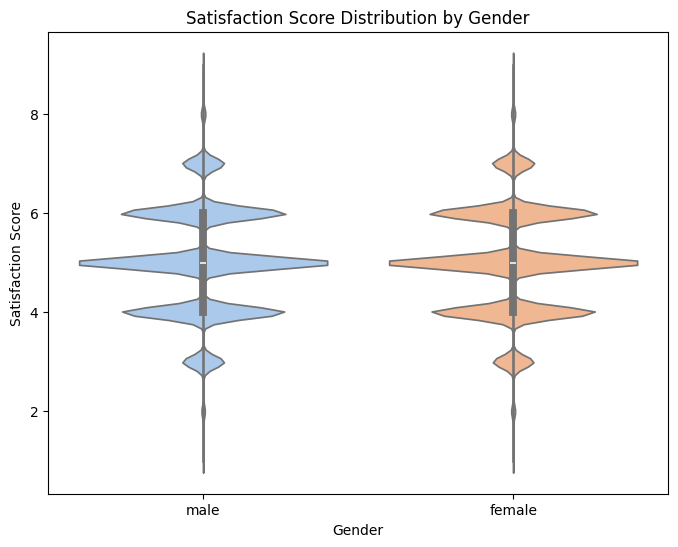

In [ ]:
#Violin Plot for Satisfaction Score by Gender
plt.figure(figsize=(8, 6))
sns.violinplot(x="gender", y="satisfaction_score", data=d1, palette="pastel")
plt.title("Satisfaction Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Satisfaction Score")
plt.show()

Product category classification

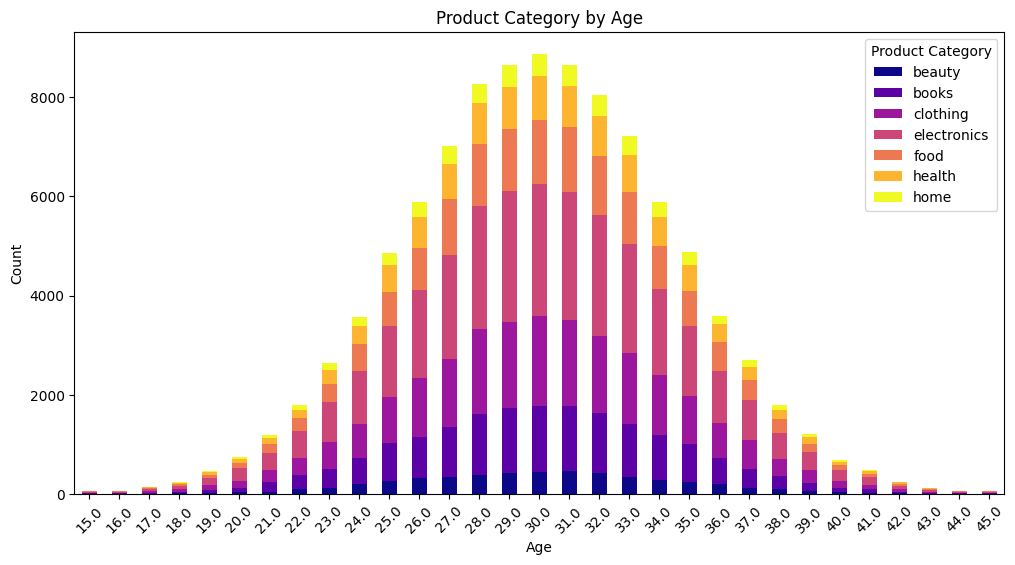

In [ ]:
#Product Category vs Age:
product_age = d1.groupby(['age', 'product_category']).size().unstack()
ax = product_age.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='plasma')
plt.title("Product Category by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Product Category")
plt.xticks(rotation=45)
plt.show()

<ipython-input-28-cc9e60b5c9af>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_income = d1[d1['income'] <= 60000].groupby(['income_group', 'product_category']).size().unstack()


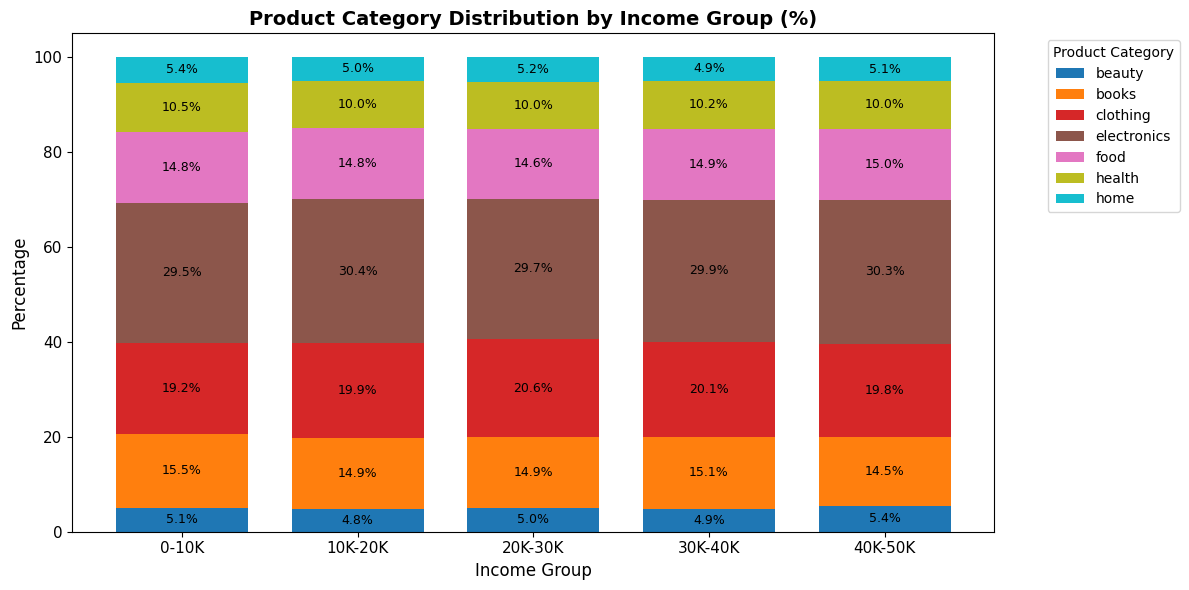

In [ ]:
#Product Category vs Income group
bins = [0, 10000, 20000, 30000, 40000, 50000]
labels = ['0-10K', '10K-20K', '20K-30K', '30K-40K', '40K-50K']
d1['income_group'] = pd.cut(d1['income'], bins=bins, labels=labels, include_lowest=True)
product_income = d1[d1['income'] <= 60000].groupby(['income_group', 'product_category']).size().unstack()
product_income_percentage = product_income.div(product_income.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(12, 6))
product_income_percentage.plot(kind='bar', stacked=True, ax=ax, colormap='tab10', width=0.75)
plt.title("Product Category Distribution by Income Group (%)", fontsize=14, fontweight='bold')
plt.xlabel("Income Group", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 3:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=9, color='black')
plt.tight_layout()
plt.show()

In [ ]:
#Purchase Frequency analysis

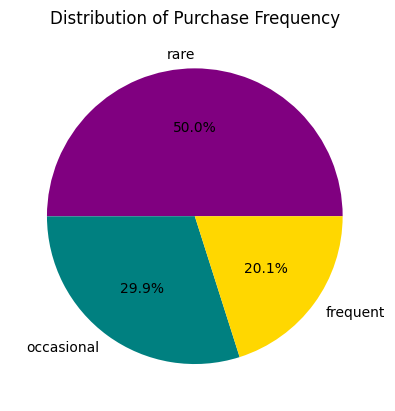

In [ ]:
#% of people who are in different frequency groups:
purchase_counts = d1['purchase_frequency'].value_counts()
plt.pie(purchase_counts, labels=purchase_counts.index, autopct='%1.1f%%', colors=['purple', 'teal', 'gold'])
plt.title("Distribution of Purchase Frequency")
plt.show()

<ipython-input-31-41d15c0c9da5>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_purchase = d1.groupby(['income_group', 'purchase_frequency']).size().unstack()


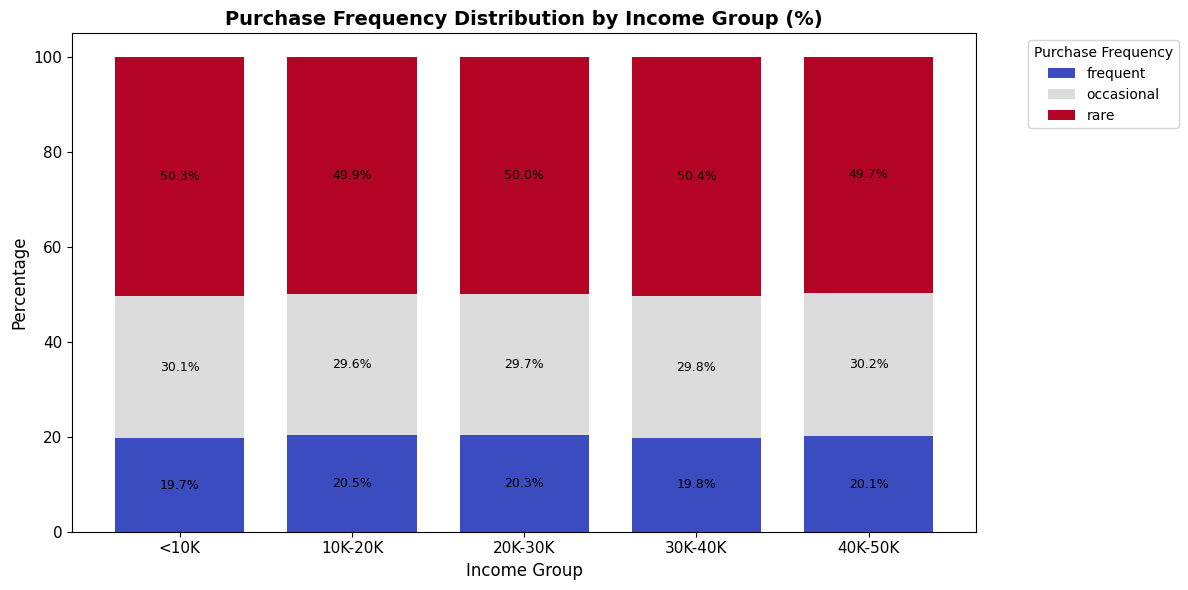

In [ ]:
#relationship b/w purchase frequency and income group
bins = [0, 10000, 20000, 30000, 40000, 50000]
labels = ['<10K', '10K-20K', '20K-30K', '30K-40K', '40K-50K']
d1['income_group'] = pd.cut(d1['income'], bins=bins, labels=labels, include_lowest=True)
income_purchase = d1.groupby(['income_group', 'purchase_frequency']).size().unstack()
income_purchase_percentage = income_purchase.div(income_purchase.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(12, 6))
income_purchase_percentage.plot(kind='bar', stacked=True, colormap='coolwarm', ax=ax, width=0.75)
plt.title("Purchase Frequency Distribution by Income Group (%)", fontsize=14, fontweight='bold')
plt.xlabel("Income Group", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Purchase Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 3:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=9, color='black')
plt.tight_layout()
plt.show()

Loyalty Analysis

<ipython-input-32-988e811d4e5f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_loyalty = d1.groupby(['age_group', 'loyalty_status']).size().unstack()


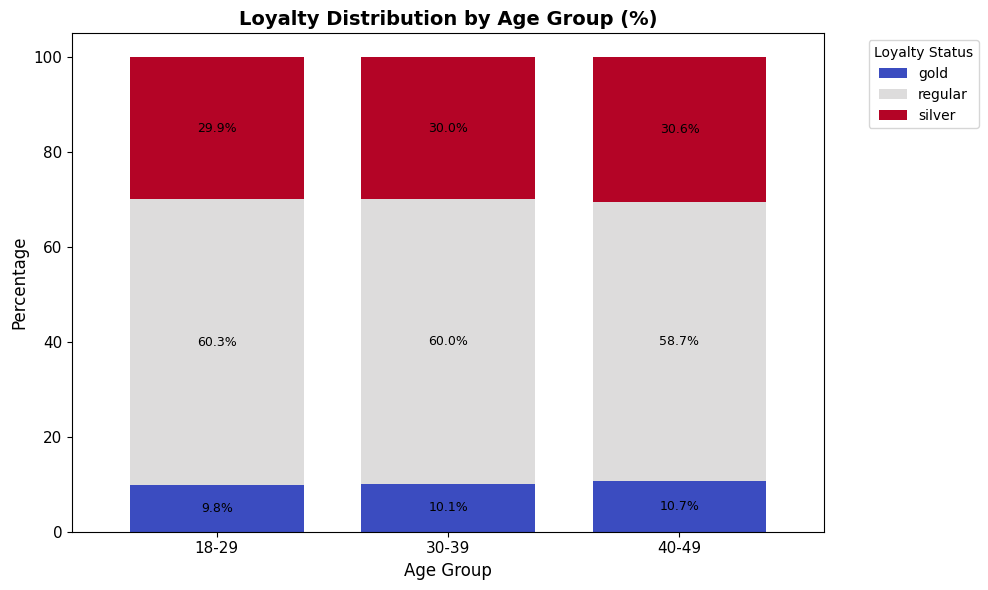

In [ ]:
#Age group and loyalty relationship:
bins = [18, 30, 40, 50]
labels = ['18-29', '30-39', '40-49']
d1['age_group'] = pd.cut(d1['age'], bins=bins, labels=labels, include_lowest=True)

age_loyalty = d1.groupby(['age_group', 'loyalty_status']).size().unstack()
age_loyalty_percentage = age_loyalty.div(age_loyalty.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(10, 6))
age_loyalty_percentage.plot(kind='bar', stacked=True, colormap='coolwarm', ax=ax, width=0.75)
plt.title("Loyalty Distribution by Age Group (%)", fontsize=14, fontweight='bold')
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Loyalty Status", bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 3:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


<ipython-input-33-81a7499d38d9>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_loyalty = d1.groupby(['income_group', 'loyalty_status']).size().unstack()


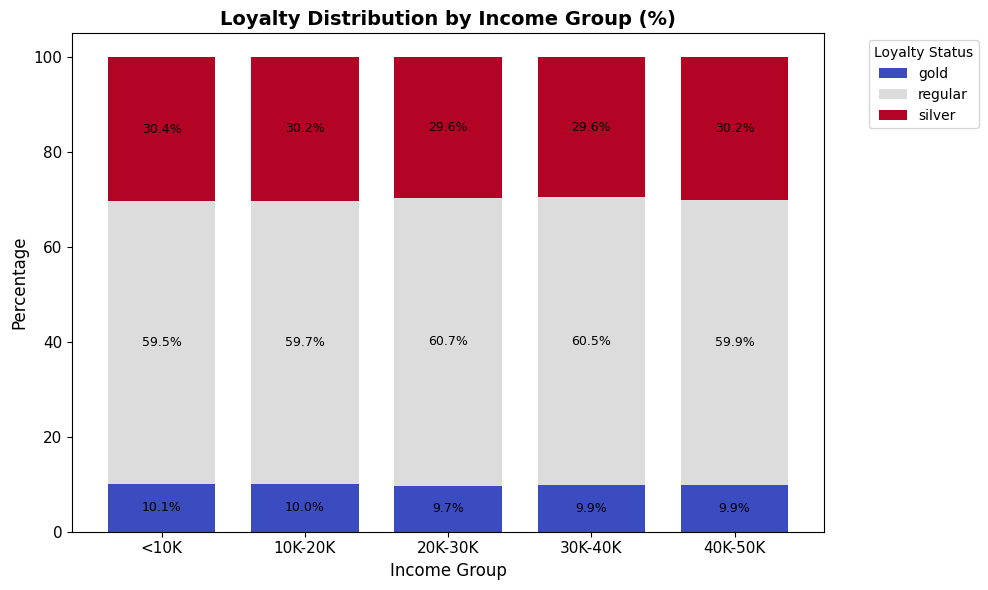

In [ ]:
#Income groups and Loyalty status relationship:
bins = [0, 10000, 20000, 30000, 40000, 50000]
labels = ['<10K', '10K-20K', '20K-30K', '30K-40K', '40K-50K']
d1['income_group'] = pd.cut(d1['income'], bins=bins, labels=labels, include_lowest=True)

income_loyalty = d1.groupby(['income_group', 'loyalty_status']).size().unstack()
income_loyalty_percentage = income_loyalty.div(income_loyalty.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(10, 6))
income_loyalty_percentage.plot(kind='bar', stacked=True, colormap='coolwarm', ax=ax, width=0.75)
plt.title("Loyalty Distribution by Income Group (%)", fontsize=14, fontweight='bold')
plt.xlabel("Income Group", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Loyalty Status", bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 3:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

In [ ]:
#Analysis on the basis of education

<ipython-input-35-15217f3bece6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="education", y="purchase_amount", data=d1, palette="viridis")


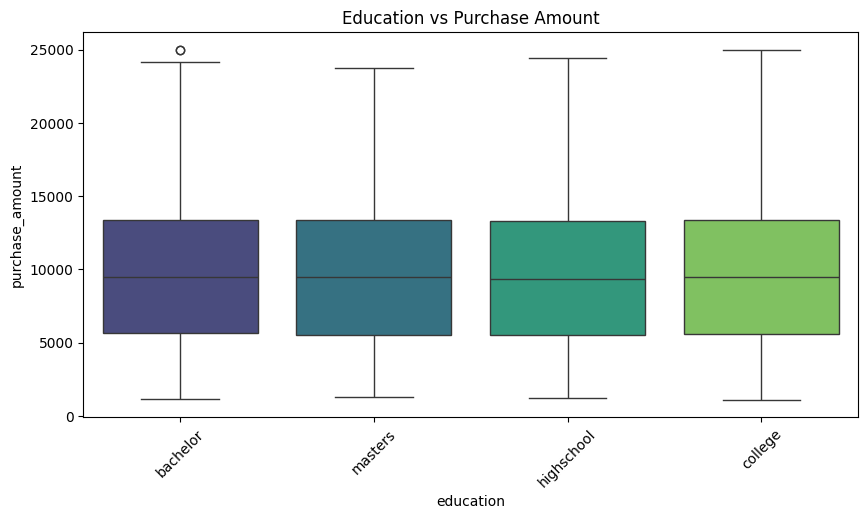

In [ ]:
# Education vs Purchase Amount
plt.figure(figsize=(10, 5))
sns.boxplot(x="education", y="purchase_amount", data=d1, palette="viridis")
plt.xticks(rotation=45)
plt.title("Education vs Purchase Amount")
plt.show()

<ipython-input-36-4fdd64a63c89>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="education", y="satisfaction_score", data=d1, palette="coolwarm")


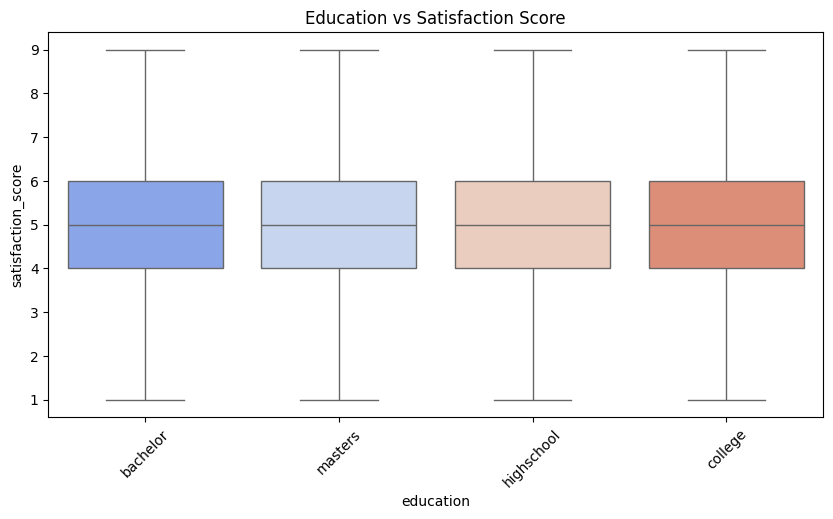

In [ ]:
# Education vs Satisfaction Score
plt.figure(figsize=(10, 5))
sns.boxplot(x="education", y="satisfaction_score", data=d1, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Education vs Satisfaction Score")
plt.show()

In [ ]:
#Analysis on the basis of Region

<ipython-input-38-9835db3562eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="region", y="purchase_amount", data=d1, palette="magma")


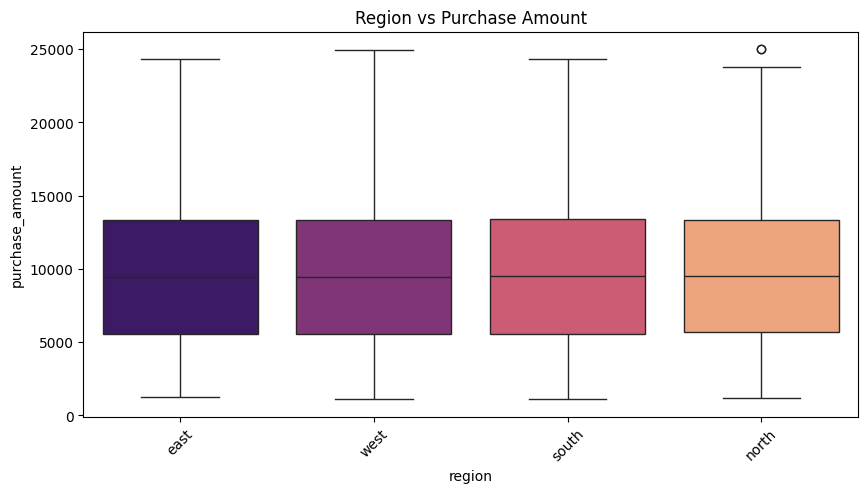

In [ ]:
# Region vs Purchase Amount
plt.figure(figsize=(10, 5))
sns.boxplot(x="region", y="purchase_amount", data=d1, palette="magma")
plt.xticks(rotation=45)
plt.title("Region vs Purchase Amount")
plt.show()

<ipython-input-39-2c0e09a019c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="region", y="satisfaction_score", data=d1, palette="plasma")


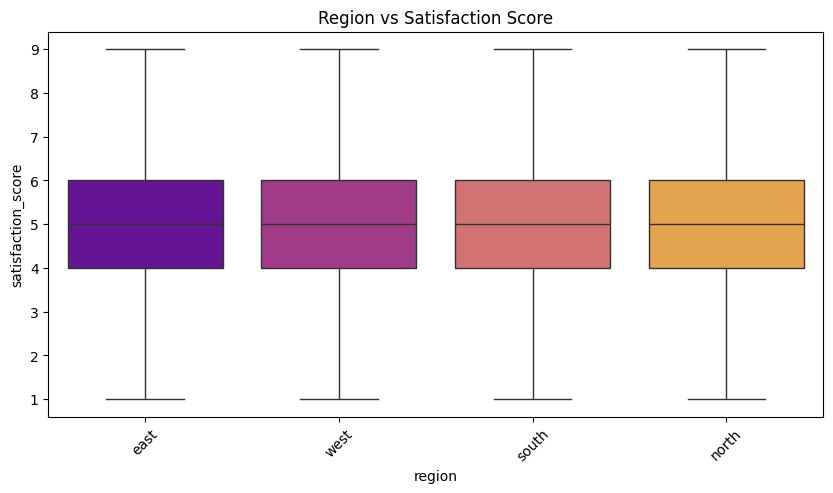

In [ ]:
# Region vs Satisfaction Score
plt.figure(figsize=(10, 5))
sns.boxplot(x="region", y="satisfaction_score", data=d1, palette="plasma")
plt.xticks(rotation=45)
plt.title("Region vs Satisfaction Score")
plt.show()

**2- Multivariable analyiss**

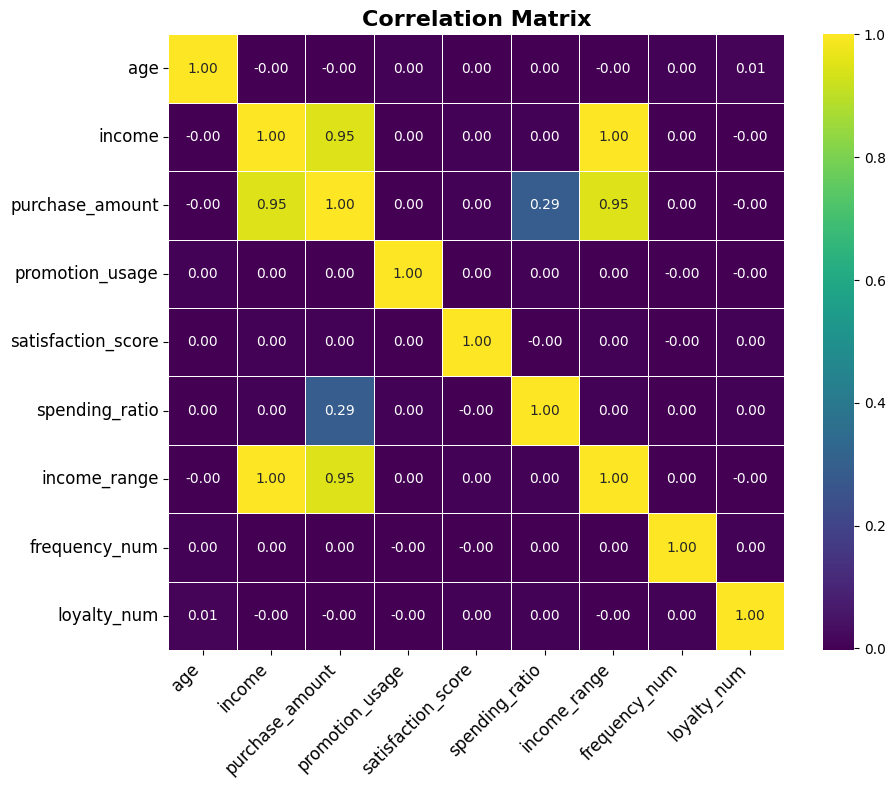

In [ ]:
#Corealational matrix
d1['frequency_num'] = d1['purchase_frequency'].map({'rare': 100, 'occasional': 200, 'frequent': 300})
d1['loyalty_num'] = d1['loyalty_status'].map({'regular': 100, 'silver': 200, 'gold': 300})

numerical_cols = d1.select_dtypes(include=['number']).columns
correlation_matrix = d1[numerical_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.7, fmt=".2f", square=True)
plt.title("Correlation Matrix", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

# Step 6: Results and Inferences

Guidelines: List out your inferences here

The following are the Results and Inferences from the data analysis:


1. 10k Data entries were analysed on the basis of the following features :

        ['age', 'gender', 'income', 'education', 'region', 'loyalty_status',
       'purchase_frequency', 'purchase_amount', 'product_category',
       'promotion_usage', 'satisfaction_score', 'spending_ratio', 'age_group',
       'income_group', 'income_range']


2. The statistical analysis is as follows

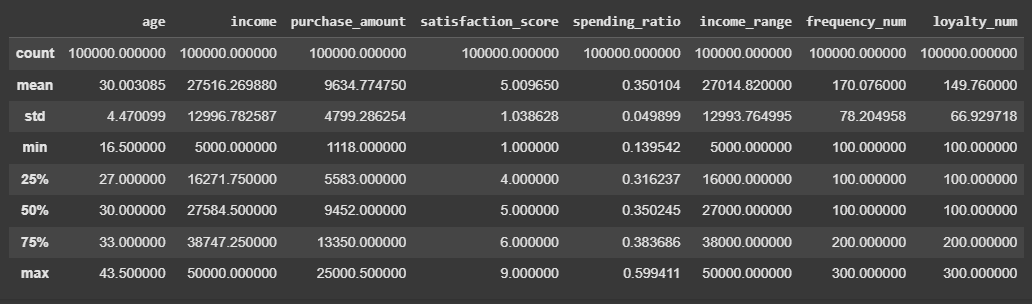
















3. The data is mostly homogenous and evenly distributed.
4. Electronics is the most sold category and beauty is the least
5. The median income of the consumers is 27k.
6. The Male-Female split is almost 50-50
7. The data shows a clear corelation between the increase in the purchase_amount and increase in income, income being positive
8. Median cutosmer spend is  35% of their total income.
9. The cluster graph shows that as the income increases, the variance in purchase patter also increases to maintain a uniform spend percentage.
10. The customer satisfaction score is also homogenous and the median score is 5
11. People having graduated from college tend to spend slightly more than people having done masters.
12. The western region contributes the highest and the norther region the least.
13. Almost 60% of total customers are regular customers, 30% in the silver bracket and 10% in the gold bracket.
14. Almost 50% of the total sale is contributed by customers who purchase rarely and only about 20% by th e frequent customers